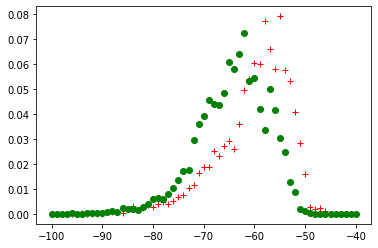

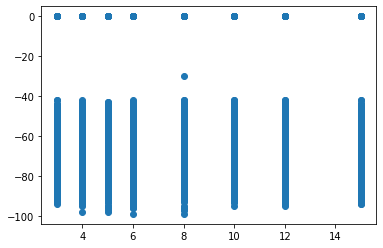

In [3]:
# Data from "Appadwedula, Swaroop" <swaroop@ll.mit.edu>

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
mat_contents = scipy.io.loadmat('angles.mat')
#print(mat_contents)

dBms = mat_contents.get('dBms')
rssipmffar = mat_contents.get('rssipmffar')
rssipmfnear = mat_contents.get('rssipmfnear')

plt.figure()
plt.plot(dBms,rssipmfnear,'r+')
plt.plot(dBms,rssipmffar,'go')

plt.figure()
rssivals = mat_contents.get('rssivals')
distfeet = mat_contents.get('distfeet')
y = rssivals
x = np.tile(distfeet,(y.shape[1],1))
plt.scatter(x,y)

In [7]:
distances = distfeet * 0.3048; # convert to meters
# add some fake noise to the distances to make plotting nicer
np.random.seed(0)
n = len(distances)
noise = np.random.normal(loc=0, scale=0.1, size=n)
#distances = distances + noise
print(distances.shape)

attenuations = rssivals;
attenuations[attenuations > -40] = -40
print(attenuations.shape)

max_meters = 15*3
distance_bins = np.arange(0, max_meters)
distances_quantized = np.digitize(distances, distance_bins)-1

attenuation_bins = np.arange(-100, -40)
attenuations_quantized = np.digitize(attenuations, attenuation_bins)-1

print(distances_quantized.shape)
print(attenuations_quantized.shape)

counts = np.zeros((len(distance_bins), len(attenuation_bins)))
for i in range(len(distances)):
  dist = distances_quantized[i]
  atten = attenuations_quantized[i]
  counts[dist,atten] += 1
  




(1, 8)
(8, 37265)
(1, 8)
(8, 37265)


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (8,) (37265,) 

In [ ]:
plt.figure(figsize=(20,10));
plt.imshow(np.log(counts));
plt.colorbar();
plt.xlabel('distance (minutes)');
plt.ylabel('RSSI (dbM)');
plt.xticks(range(0,len(distance_bins)), distance_bins);
plt.yticks(range(0,len(attenuation_bins)), attenuation_bins);